In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
plt.rcParams.update({
    'savefig.facecolor': (0, 0, 0, 0),
    'figure.dpi': 100,
    'axes.labelsize': 'small',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'axes.titlesize': 'medium', 
})

In [3]:
df = pd.read_csv('./datasets/sabor.csv', delimiter='\t')

df.drop("Unnamed: 3", axis=1, inplace=True)
df['Stranačka pripadnost'].replace('Neovisni za Hrvatsku', 'NZH', inplace=True)
df['Prezime i ime'] = df['Prezime i ime'].str.title()

df.fillna(value=0.0, inplace=True)

df['ukupno_prijevoz'] = (df.Dnevnica + df.Automobil + df.Cestarina + 
                         df.Avion + df['Javni prijevoz'] + df.Hotel)
df['ukupno_smjestaj'] = (df.Stanarina + df.Režije +
                         df['Odvojeni život'] + df['Službeni stan'])

df.head()

,Osoba,Stranačka pripadnost,Prezime i ime,Ukupno,Dnevnica,Automobil,Cestarina,Avion,Javni prijevoz,Hotel,Stanarina,Režije,Odvojeni život,Službeni stan,Ostalo,ukupno_prijevoz,ukupno_smjestaj
0,1.0,SNAGA,Aleksić Goran,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1,2.0,SDP,Alfirev Marija,9175.69,0.00,5940.0,1144.0,0.00,0.0,0.0,925.02,0.00,1166.67,0.0,0.00,7084.00,2091.69
2,0.0,SDP,Klarin Ivan Do 01.10.17.,42688.95,0.00,5600.0,821.0,0.00,0.0,0.0,24975.54,5292.41,6000.00,0.0,0.00,6421.00,36267.95
3,3.0,HDZ,Babić Ante,52100.97,3347.66,28000.0,0.0,17009.38,0.0,0.0,0.00,0.00,3706.46,0.0,37.47,48357.04,3706.46
4,0.0,HDZ,Krstulović Opara Andro Do 25.05.,22068.45,1050.00,2448.0,522.0,5105.00,0.0,0.0,0.00,156.55,4361.90,8050.0,375.00,9125.00,12568.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
Osoba                   166 non-null float64
Stranačka pripadnost    166 non-null object
Prezime i ime           166 non-null object
Ukupno                  166 non-null float64
Dnevnica                166 non-null float64
Automobil               166 non-null float64
Cestarina               166 non-null float64
Avion                   166 non-null float64
Javni prijevoz          166 non-null float64
Hotel                   166 non-null float64
Stanarina               166 non-null float64
Režije                  166 non-null float64
Odvojeni život          166 non-null float64
Službeni stan           166 non-null float64
Ostalo                  166 non-null float64
ukupno_prijevoz         166 non-null float64
ukupno_smjestaj         166 non-null float64
dtypes: float64(15), object(2)
memory usage: 22.1+ KB


In [5]:
df.Ukupno.median(), df.Ukupno.mean()

(48827.965, 49909.71289156626)

In [6]:
df.groupby('Stranačka pripadnost')['Ukupno'].count().sort_values()

Stranačka pripadnost
Reformisti     1
PH             1
HRAST          1
HSLS           1
NLM            1
HSU            1
SNAGA          1
BM 365         2
HDS            2
HDSSB          2
NZH            2
IDS            3
ŽIVI ZID       3
GLAS           4
SDSS           4
HSS            5
HNS            6
MOST          14
NZ            18
SDP           32
HDZ           62
Name: Ukupno, dtype: int64

In [7]:
def isplotaj(tablica, xlabel="", ylabel="", naslov="", 
             velicina=(6, 4.5), filename=""):
    fig, ax = plt.subplots(1, 1, figsize=velicina)
    tablica.plot(
        kind='barh',
        ax=ax,
        width=0.7,
        color='C0',
    )
    
    for bar, value in zip(ax.patches, tablica.values):
        if value > 0.2:
            x = bar.get_width()
            y = bar.get_y()
            dx = ax.get_xbound()[1] / 100
            dy = bar.get_height() / 2
            ax.text(x-dx, y+dy, f"{value:.1f}", 
                    va='center', ha='right', color='white')
    
    ax.set(
        xlabel=xlabel,
        ylabel=ylabel,
        title=naslov,
    )
    fig.tight_layout()
    
    if filename:
        fig.savefig(f'./figures/sabor/{filename}.png')

In [8]:
def isplotaj_ukupne_troskove(
    tablica, kategorija, naslov="", kolicina=1000,
    velicina=(6, 4.5), filename=""):

    najveci_troskovi = (tablica.groupby(kategorija)['Ukupno']
            .sum().sort_values()[-15:] / kolicina)

    str_kolicina = ""
    if kolicina == 1000:
        str_kolicina = 'tisuće'
    elif kolicina == 1_000_000:
        str_kolicina = 'milijuni'

    xlabel = f"{str_kolicina} kuna"
    
    isplotaj(
        najveci_troskovi, xlabel=xlabel, velicina=velicina,
        naslov=naslov, filename=filename)


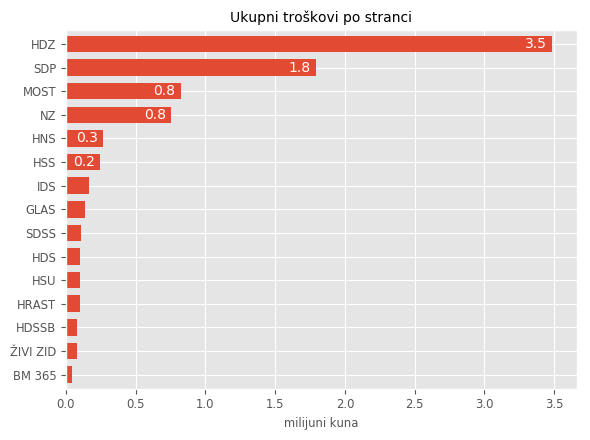

In [10]:
isplotaj_ukupne_troskove(
    df,
    kategorija = 'Stranačka pripadnost',
    naslov = "Ukupni troškovi po stranci",
    kolicina = 1_000_000,
    filename = "01_ukupno_stranke",
)

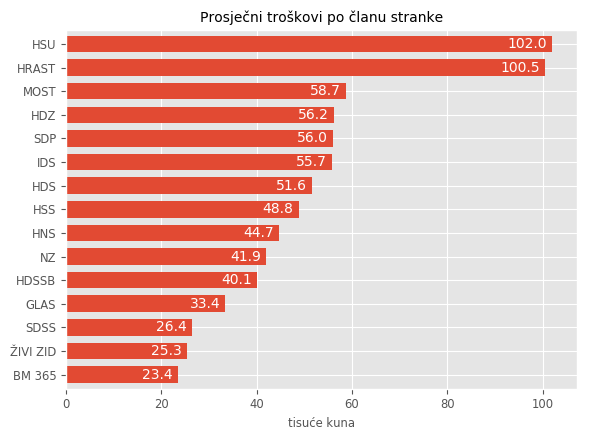

In [11]:
po_zastupniku = df.groupby('Stranačka pripadnost')['Ukupno'].mean().sort_values()

isplotaj(
    po_zastupniku[-15:] / 1000,
    xlabel = "tisuće kuna",
    naslov = "Prosječni troškovi po članu stranke",
    filename = "02_prosjecno_stranke",
)

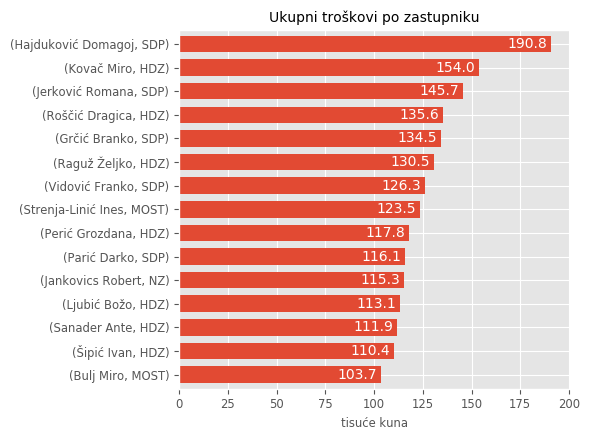

In [12]:
isplotaj_ukupne_troskove(
    df,
    kategorija = ['Prezime i ime', 'Stranačka pripadnost'],
    naslov = "Ukupni troškovi po zastupniku",
    filename = "03_ukupno_zastupnik",
)

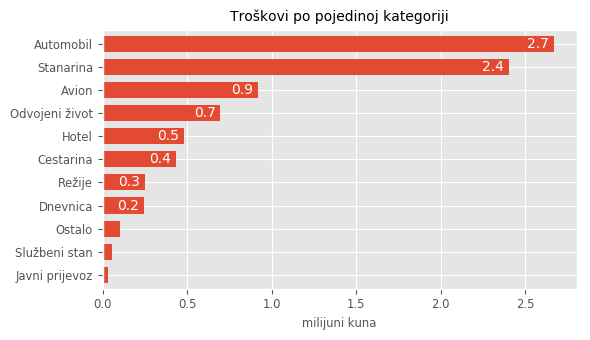

In [13]:
vrste_troskova = df.loc[:, 'Dnevnica':'Ostalo'].columns
ukupno_po_trosku = df.loc[:, vrste_troskova].sum().sort_values()

isplotaj(
    ukupno_po_trosku / 1_000_000,
    xlabel = "milijuni kuna",
    naslov = "Troškovi po pojedinoj kategoriji",
    filename = "04_po_kategoriji",
    velicina = (6, 3.5)
)

### Pregled troskova po kategorijama

Ne koristi se u clanku. Samo za pregled i odabir pojedinih kategorija

In [14]:
def isplotaj_po_trosku(tablica, trosak, filename=""):
    po_trosku_stranka = (df.groupby('Stranačka pripadnost')[trosak]
                         .mean().sort_values(na_position='first')[-10:] / 1000)
    po_trosku_pojedinac = (df.groupby(
        ['Prezime i ime', 'Stranačka pripadnost'])[trosak]
                           .sum().sort_values(na_position='first')[-20:] / 1000)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
    
    for tablica, ax in zip([po_trosku_stranka, po_trosku_pojedinac], (ax1, ax2)):
        tablica.plot(
            kind='barh',
            ax=ax,
            width=0.7,
            color='C0',
        )

        for bar, value in zip(ax.patches, tablica.values):
            if value > 0.2:
                x = bar.get_width()
                y = bar.get_y()
                dx = ax.get_xbound()[1] / 100
                dy = bar.get_height() / 2
                ax.text(x-dx, y+dy, f"{value:.1f}", 
                        va='center', ha='right', color='white')

        ax.set_ylabel("")
                
    ax1.set(
        title=trosak,
    )    
    ax2.set(
        xlabel="tisuće kuna",
    )
        
    fig.tight_layout()
    
    if filename:
        fig.savefig(f'./figures/sabor/{filename}.png')

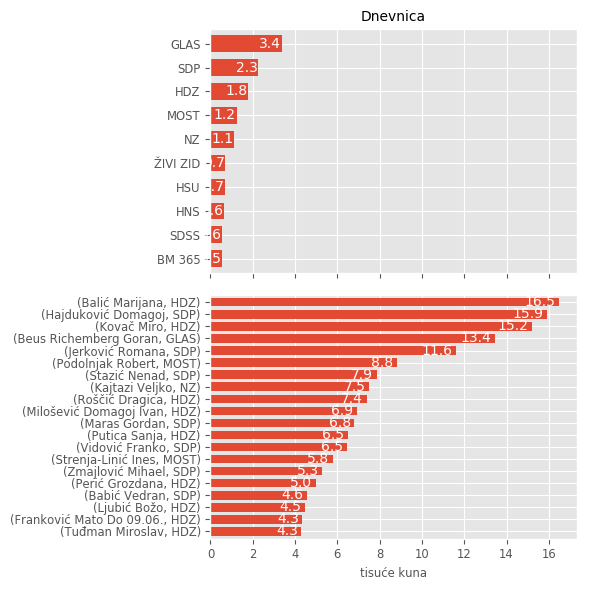

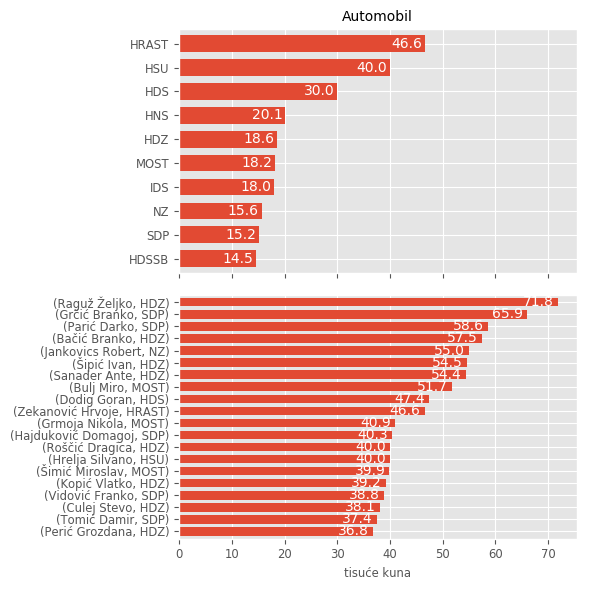

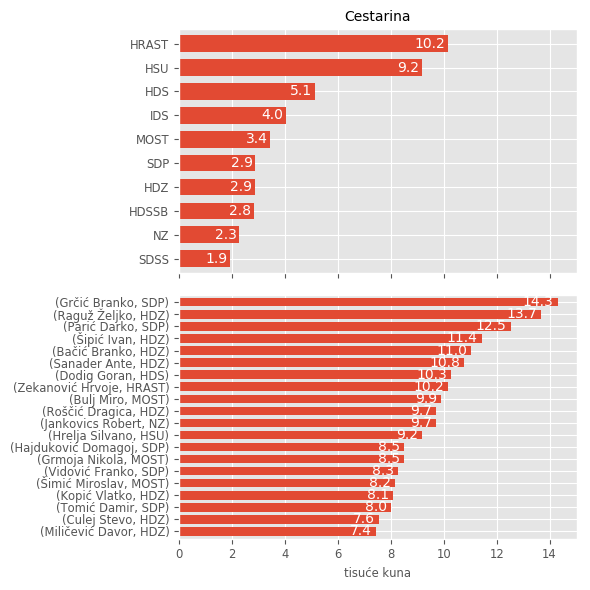

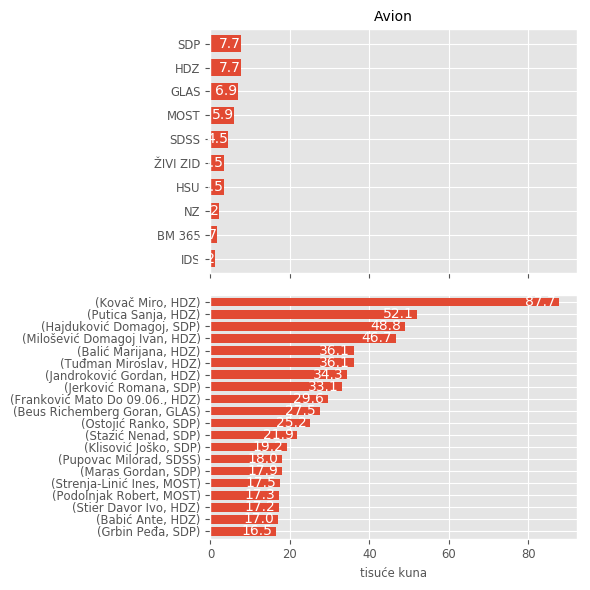

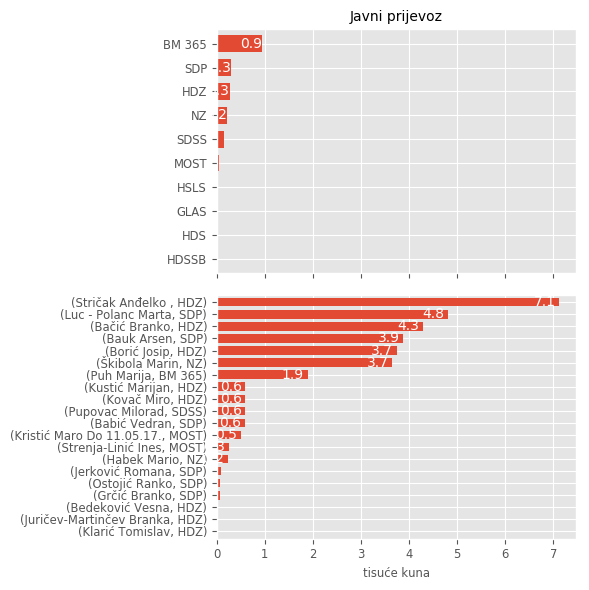

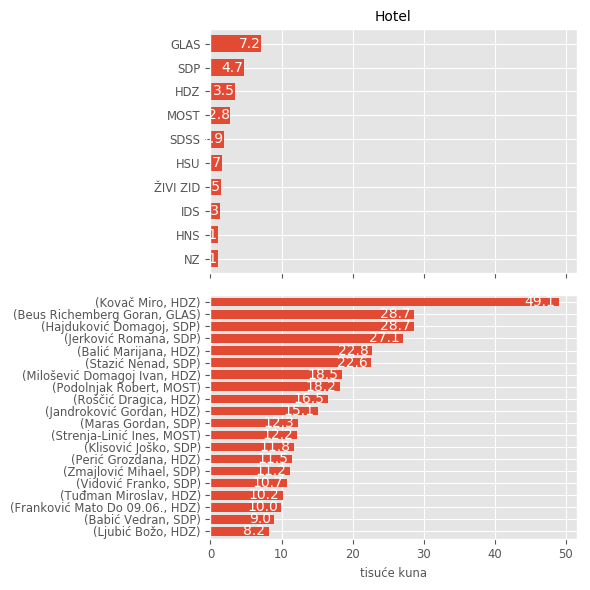

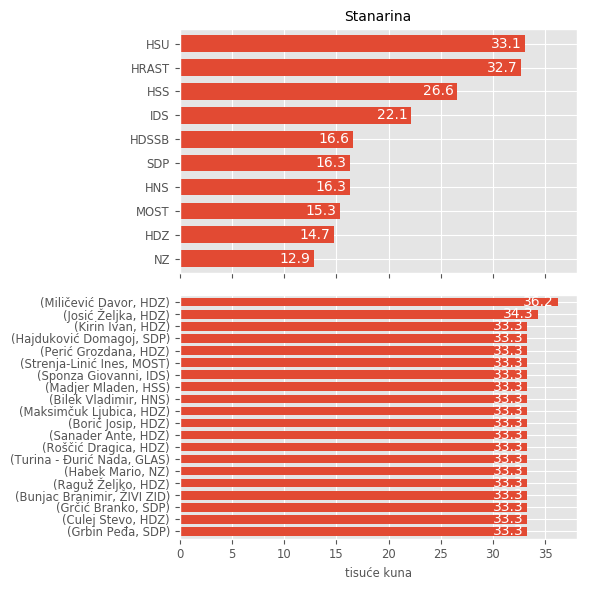

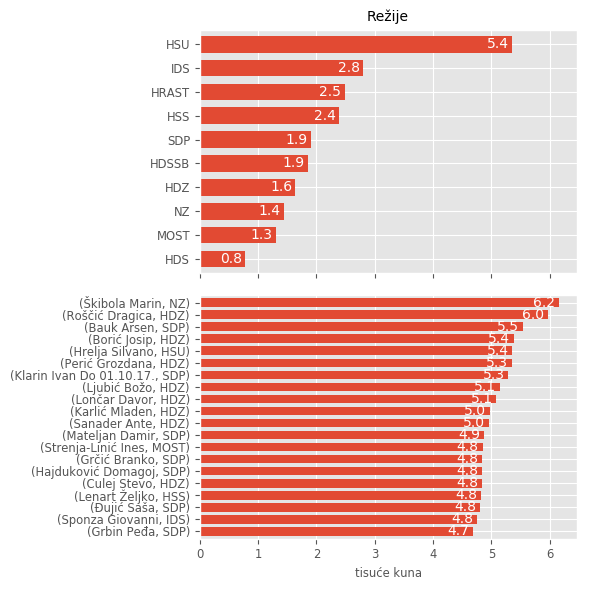

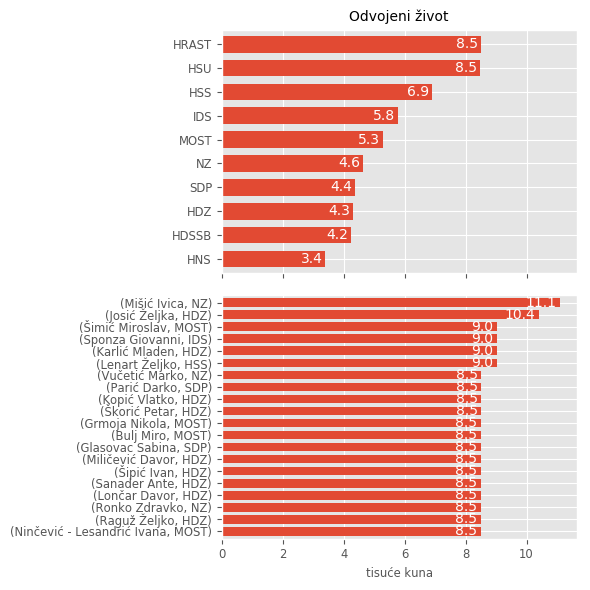

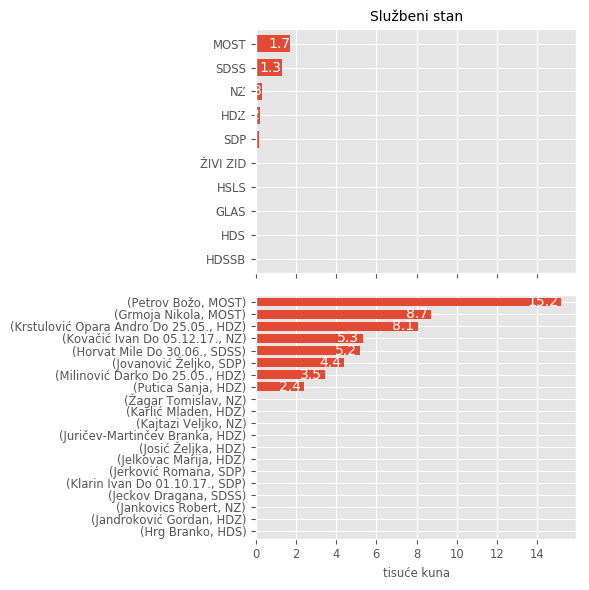

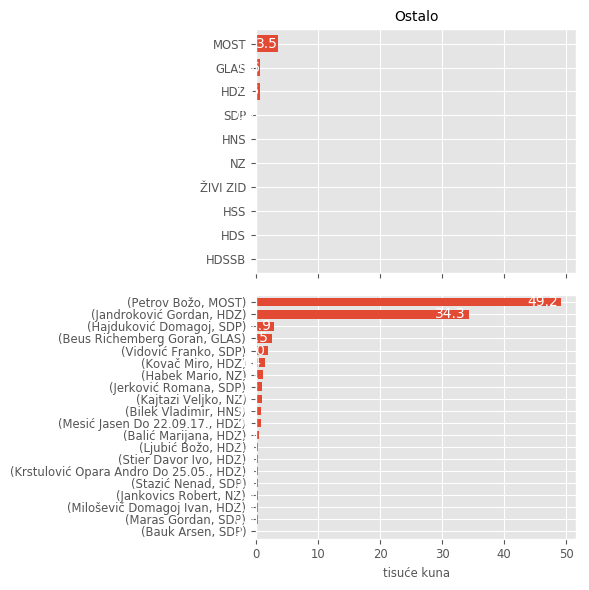

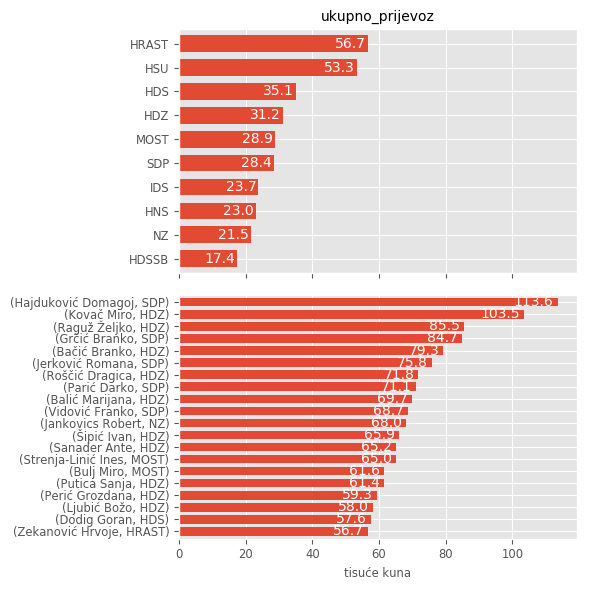

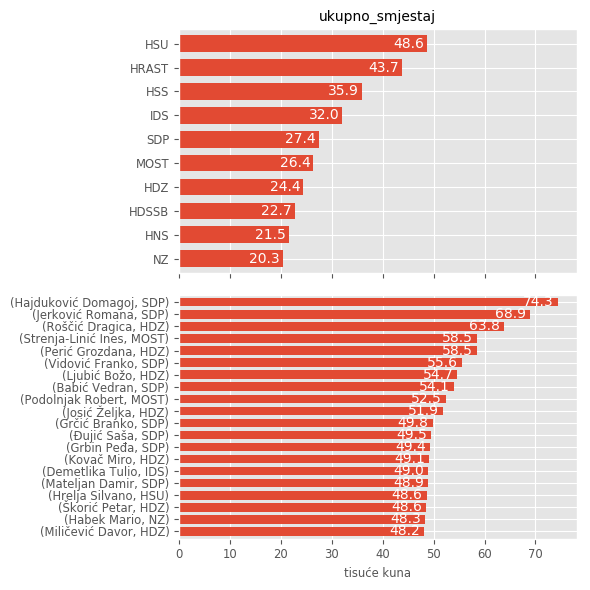

In [15]:
vrste_troskova = df.loc[:, 'Dnevnica':].columns

for i, trosak in enumerate(vrste_troskova, 5):
    isplotaj_po_trosku(df, trosak)#, f"{i:02d}_kategorija_{trosak.replace('.', '-')}")

### Troskovi po odabranim kategorijama

In [20]:
odabrani_troskovi = [
    'Automobil', 'Cestarina', 'Avion', 'Dnevnica', 'Hotel', 'ukupno_prijevoz',
    'Stanarina', 'Odvojeni život', 'ukupno_smjestaj'
]
odabrani_naslovi = [
    'Troškovi automobila',
    'Troškovi cestarina',
    'Troškovi aviona',
    'Troškovi dnevnica',
    'Troškovi hotela',
    'Ukupni troškovi putovanja',
    
    'Troškovi stanarine',
    'Naknada za odvojeni život',
    'Ukupni troškovi smještaja'
]

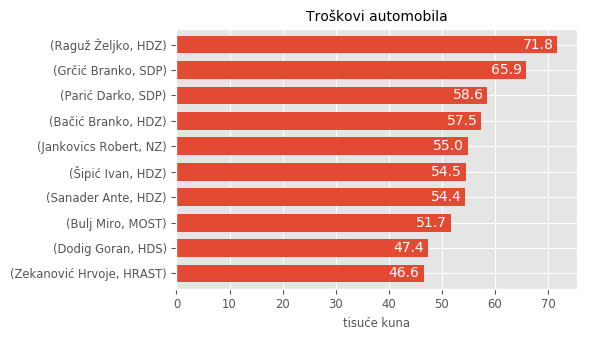

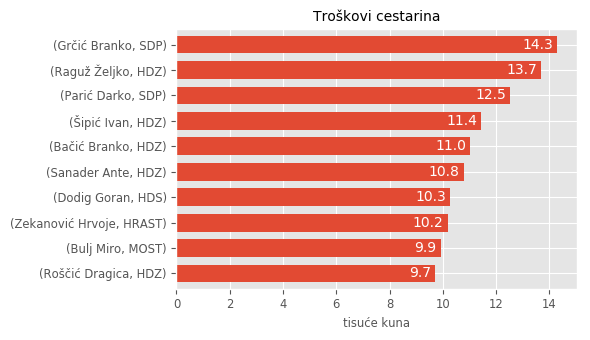

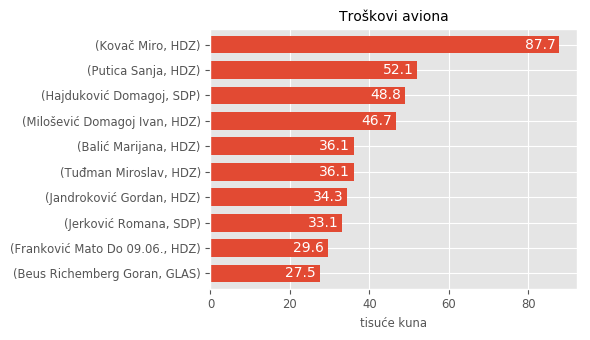

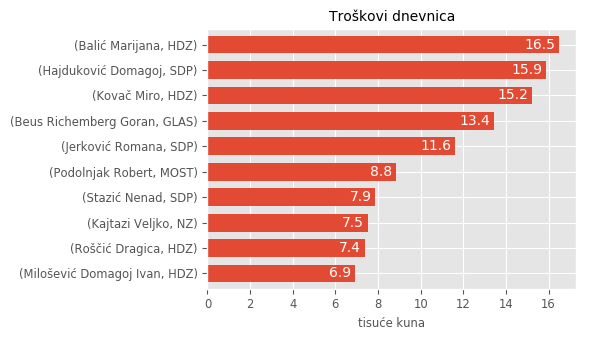

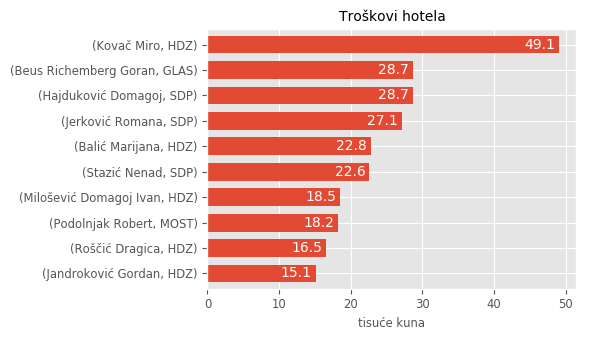

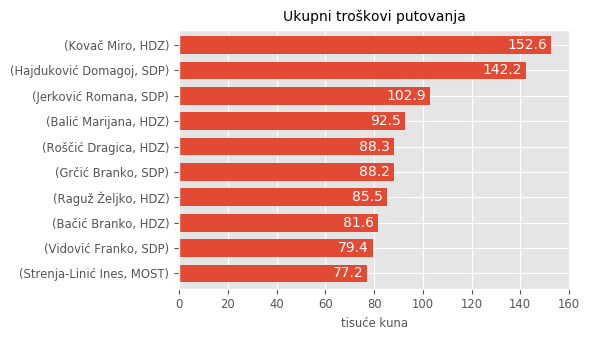

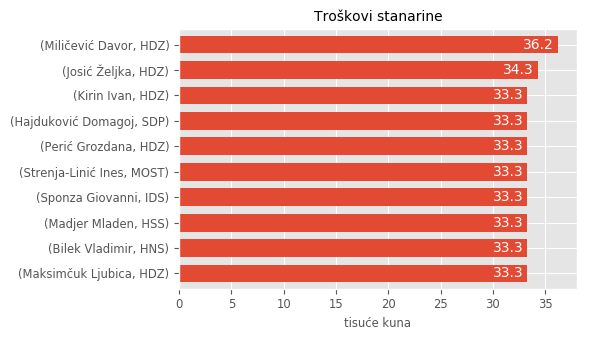

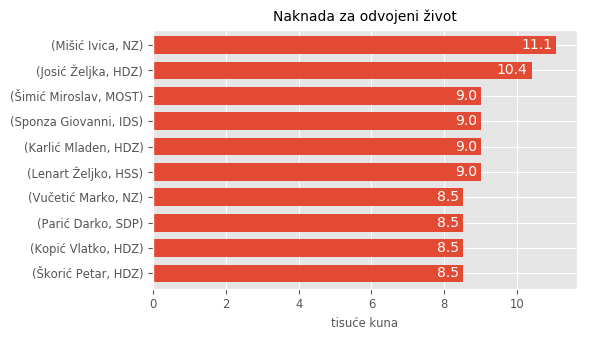

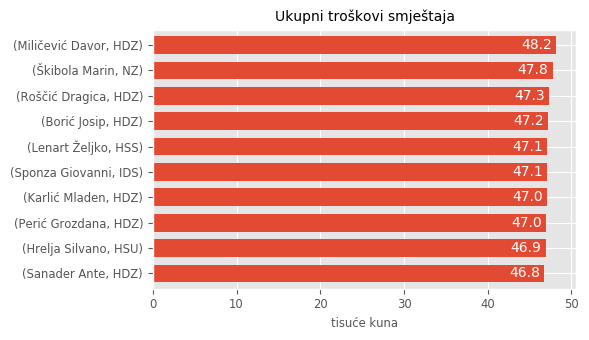

In [21]:
for i, (trosak, naslov) in enumerate(
        zip(odabrani_troskovi, odabrani_naslovi), 5):
    po_trosku = (
        df.groupby(
        ['Prezime i ime', 'Stranačka pripadnost'])[trosak]
        .sum().sort_values(na_position='first')[-10:] / 1000)
    isplotaj(
        po_trosku,
        xlabel = 'tisuće kuna',
        naslov = naslov,
        velicina = (6, 3.5),
        filename = f"{i:02d}_{trosak.replace(' ', '_')}"
    )
    
    

### Podaci o troskovima prijevoza i smjestaja

In [19]:
df.ukupno_prijevoz.median(), df.ukupno_prijevoz.mean()

(24217.870000000003, 28800.07692771084)

In [12]:
df.ukupno_smjestaj.median(), df.ukupno_smjestaj.mean()

(14346.744999999999, 20502.649457831325)

In [13]:
df[df.Stanarina > 0].ukupno_smjestaj.mean()

39205.90771084337

In [17]:
df.ukupno_prijevoz.sort_values()[-10:].sum()

990340.7299999999

In [14]:
prijevoz = (df.groupby(
    ['Prezime i ime', 'Stranačka pripadnost'])['ukupno_prijevoz']
            .sum().sort_values(na_position='first'))

In [18]:
prijevoz[:-2].median(), prijevoz[:-2].mean()

(23855.5, 27353.725365853657)